# Happiness Score Prediction

- Takes 3 parameters perceived productivity, social life, work-life balance [scale of 0-1] and predicts the happiness score

Dataset format:
- productivity: float
- social_life: float
- work_life_balance: float
- happiness_score: float

e.g.
[0.9, 0.9, 0.7, 0.7]
[0.9, 0.8, 0.8, 0.8]
[0.8, 0.7, 0.8, 0.6]
[0.7, 0.6, 1, 0.5]

Algorithm:
- Finding the co-relation between the parameters and the happiness score
- Predicting the happiness score based on the distance between the parameters and the dataset
- Finding the k nearest neighbors and calculating the average happiness score
- If the average happiness score is greater than 0.5, then the person is happy, otherwise not happy

Summarise which parameters are more important in predicting the happiness score for a person

In [2]:
! pip install pandas numpy seaborn python-decouple

zsh:1: command not found: pip


In [3]:
# dataset = [
#     [0.9, 0.9, 0.7, 0.7],
#     [0.9, 0.8, 0.8, 0.8],
#     [0.8, 0.7, 0.8, 0.6],
#     [0.7, 0.6, 1, 0.5]
# ]
# 
# import pandas as pd
# 
# dataframe = pd.DataFrame(dataset, columns=['productivity', 'social_life', 'work_life_balance', 'happiness_score'])
# dataframe.to_csv('happiness_score.csv', index=False)

## Read from Test dataset

In [9]:
import pandas as pd

dataframe = pd.read_csv('happiness_score.csv')
# [dataframe['productivity'][i] for i in range(len(dataframe))]

## Read dataset from docs spreadsheet url

In [31]:
from dotenv import load_dotenv
import os

load_dotenv()
parameters = ['productivity', 'social life', 'work life balance', 'Happiness score']
keys = [f'Month {i} [{parameter}]' for i in range(1, 6) for parameter in parameters]
sheet_url = os.getenv('SPREADSHEET_URL')
csv_export_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

dataframe = pd.read_csv(csv_export_url)
dataframe = dataframe.dropna(axis='columns')

cols = ['Timestamp'] + ['Month no.'] + keys
# Transform the dataframe by extracting the month from column names and using it as row index
dataframe = dataframe.to_dict()

# dataframe.keys()

,0
Timestamp,5/21/2024 21:16:45
Month 1 [productivity],8
Month 1 [social life],8
Month 1 [work life balance],8
Month 1 [Happiness score],8
Month 2 [productivity],8
Month 2 [social life],8
Month 2 [work life balance],8
Month 2 [Happiness score],8
Month 3 [productivity],9


## Predict happiness score

In [10]:
from typing import List


def predict_happiness_score(parameters: dict):
    happiness_scores = []
    keys = dataframe.keys()[:-1]
    for i in range(len(dataframe)):
        distance = 0
        for key in keys:
            distance += (dataframe[key][i] - parameters[key]) ** 2
        happiness_scores.append((distance, dataframe['happiness_score'][i]))
    happiness_scores.sort()
    happiness_scores = happiness_scores[:3]
    happiness_score = sum([score for distance, score in happiness_scores]) / len(happiness_scores)
    return round(happiness_score, 3)


In [11]:
def is_happy(parameters: List[float]):
    happiness_score = predict_happiness_score(parameters)
    return happiness_score > 0.5

In [12]:
parameters = {
    'productivity': .9,
    'social_life': 0.9,
    'work_life_balance': .7
}
score = predict_happiness_score(parameters)
happy = is_happy(parameters)
print(f"{score = }, {happy = }")

score = 0.8, happy = True


## Pairwise Scatter Plot

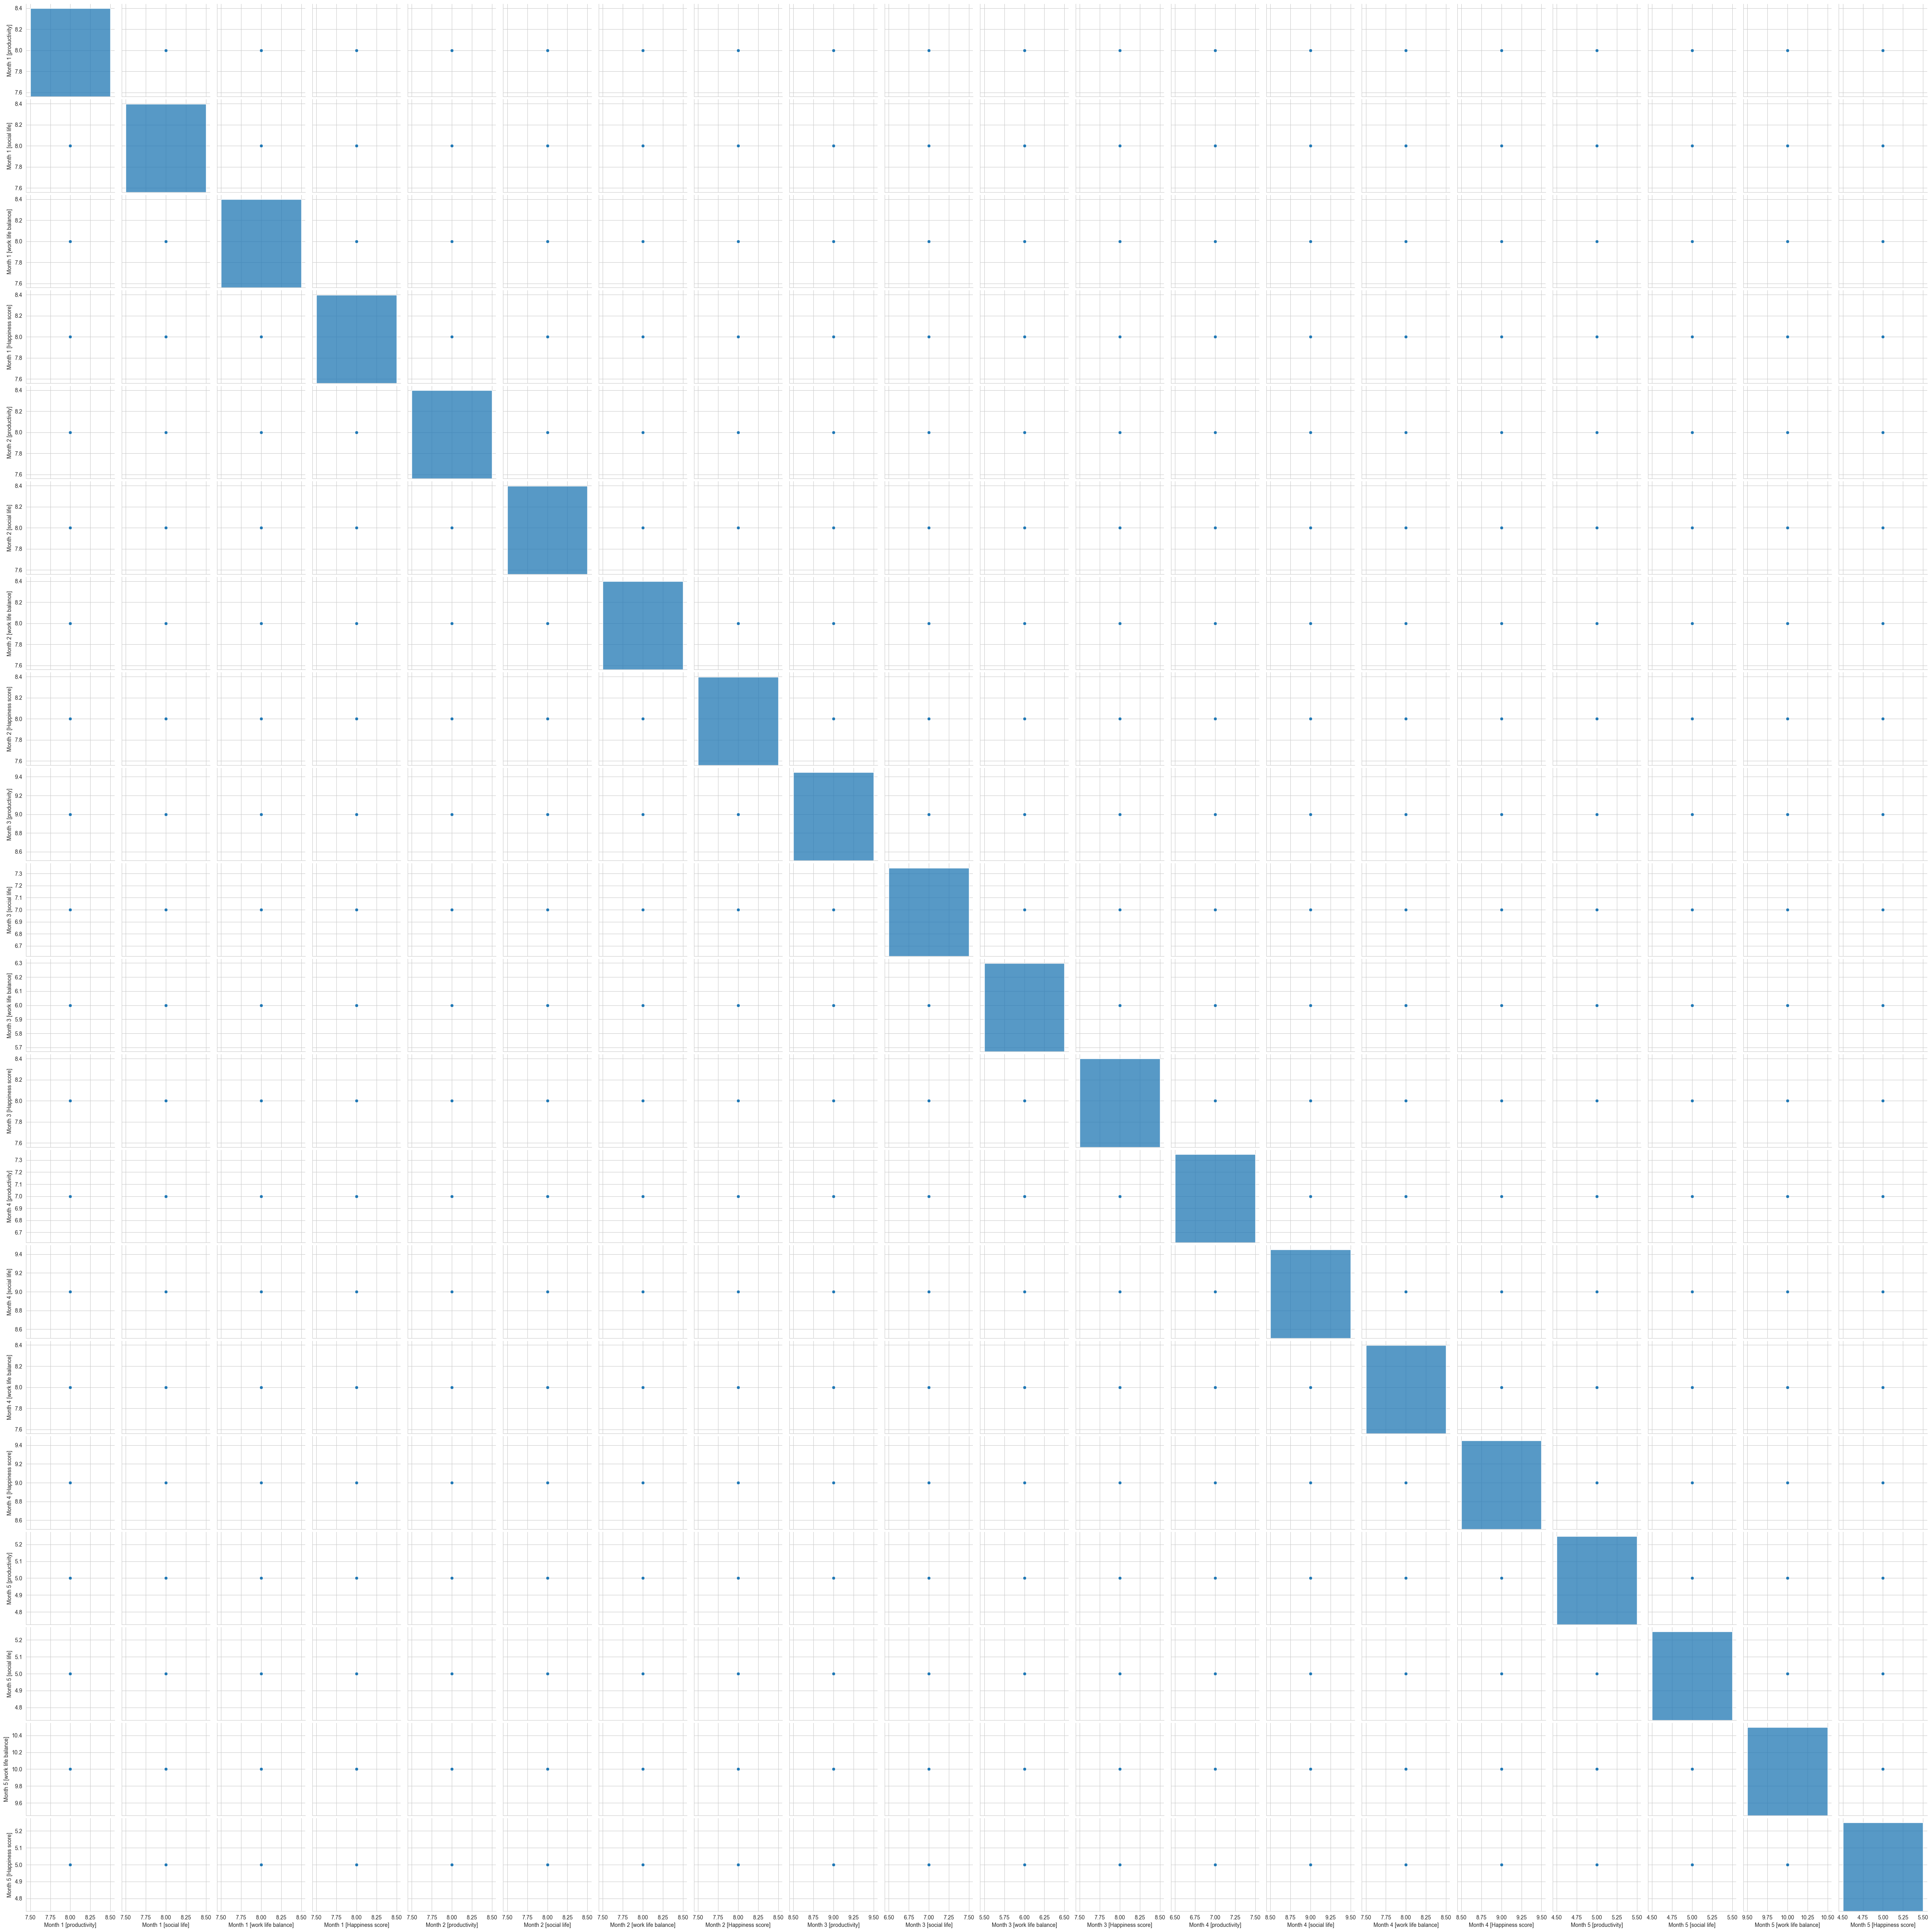

In [29]:
# ! pip install seaborn pandas
import seaborn

seaborn.pairplot(dataframe)

# Calculating correlation coefficient

In [14]:
corr_matrix = round(dataframe.corr(), 2)

print(
    f"Highly correlated variables to happiness are in the order of importance:\n{corr_matrix['happiness_score'].sort_values(ascending=False)[1:]}")

Highly correlated variables to happiness are in the order of importance:
productivity         0.93
social_life          0.87
work_life_balance   -0.87
Name: happiness_score, dtype: float64


## Correlation Matrix

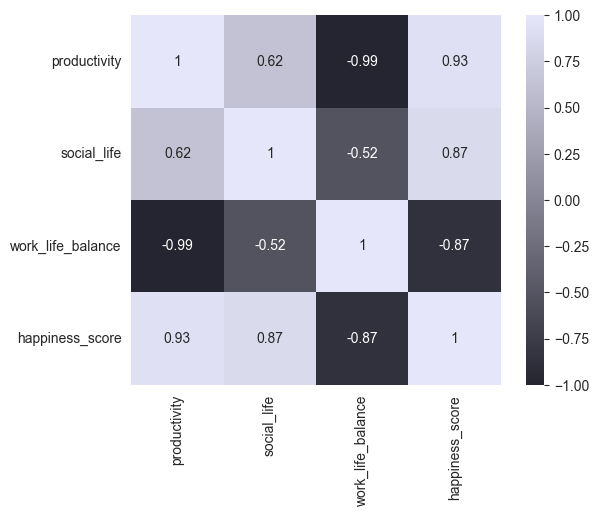

In [16]:
import seaborn as sns

axis_corr = sns.heatmap(
    corr_matrix, vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.dark_palette("lavender", as_cmap=True),
    square=True
)
